Tạo Sinusoids bằng Python
Gần đây tôi đã dành một lượng thời gian khá lớn để học Python, nhưng hầu hết những nỗ lực của tôi đã tập trung vào mô-đun đồ họa rùa. Rất nhiều niềm vui, và một số hình ảnh tôi có thể tạo ra khá thú vị (ít nhất là với tôi), nhưng điều tôi thực sự muốn làm là học cách làm mọi thứ với âm thanh Vì vậy tôi đã bắt đầu học DSP. Tôi khá khó hiểu với các hàm liên tục, nhưng các hàm rời rạc lúc đầu có thể là một thách thức - lập chỉ mục ý nghĩa của tần số và thời gian, v.v ... Với một thực tế nhỏ - đó là tất cả bài đăng này - nó trở nên rõ ràng khá nhanh. Trên đường đi, tôi nhận được một số âm mưu thực hành với Matplotlib, Numpy và Scipy Thứ tự kinh doanh đầu tiên, tôi muốn hiểu thế hệ hình sin Phương trình cơ bản là:
x(t)=Acos(2πft+ϕ)
Dưới đây là sơ đồ hình sin 5 Hz với độ trễ pha là pi / 4 radian

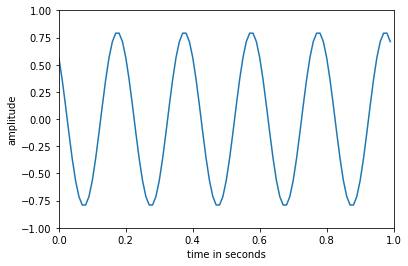

In [9]:
%matplotlib inline
# khai bao thu vien 
import numpy as np
import matplotlib.pyplot as plt #khai báo giao diện pyplot
A = .8# bien do
f = 5 # tần số
t = np.arange(0,1,.01)# Lấy mẫu tu 0 ->1 buoc nhay 0.01
phi = np.pi/4
x = A*np.cos(2*np.pi*f*t + phi)
plt.plot(t,x) #hình vẽ theo t,x
plt.axis([0,1,-1,1])#nhận giá trị 0,1,-1,1 và biểu diễn trên trục số
plt.xlabel('time in seconds')#hiển thị time second cho trục hoành
plt.ylabel('amplitude')#hiển thị amplitude cho trục tung
plt.show() #hiển thị hình vẽ

Ở trên được "lấy mẫu" theo một nghĩa nào đó, theo đó nó dựa trên một mảng có độ dài 100 với mỗi phần tử cách nhau 01

Để căn cứ vào mẫu một cách rõ ràng, bạn có thể sử dụng một trong hai biểu thức:
x=Acos(2πfnT+ϕ) , trong đó n là chỉ số mẫu và T là khoảng thời gian mẫu hoặc

x=Acos(2πfn/N+ϕ), trong đó n là chỉ số mẫu và N là lượng mẫu.

x=Acos(2πfnT+ϕ) cho: 

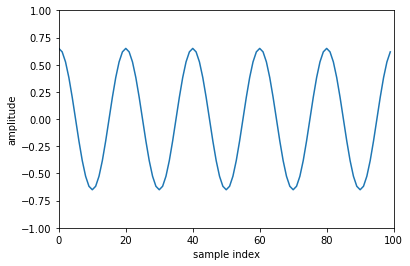

In [2]:
A = .65
fs = 100
samples = 100
f = 5
phi = 0
n = np.arange(samples)
T = 1.0/fs # Remember to use 1.0 and not 1!
y = A*np.cos(2*np.pi*f*n*T + phi)
plt.plot(y) #hình vẽ theo y
plt.axis([0,100,-1,1]) #nhận giá trị 0,100,-1,1 và biểu diễn trên trục số
plt.xlabel('sample index') #hiển thị sample index cho trục hoành
plt.ylabel('amplitude') #hiển thị amplitude cho trục tung
plt.show()# hiển thị hình vẽ

x=Acos(2πfn/N+ϕ)  là là "độc lập" với thời gian, trong tần số đó phụ thuộc vào mẫu
tỷ lệ, hoặc thực sự trên cơ sở thời gian của tỷ lệ mẫu. Vì vậy, nếu tỷ lệ mẫu của bạn là 100 mẫu mỗi ngày
và f 5, tần suất của bạn sẽ là 5 chu kỳ mỗi ngày.

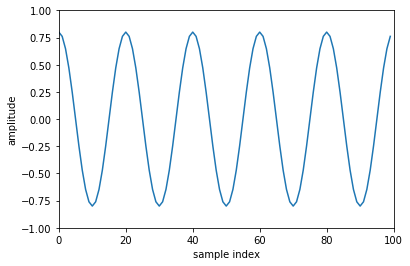

In [10]:
A = .8
N = 100 # samples
f = 5
phi = 0
n = np.arange(N)
y = A*np.cos(2*np.pi*f*n/N + phi)
plt.plot(y) #hình vẽ theo y
plt.axis([0,100,-1,1])#nhận giá trị 0,100,-1,1 và biểu diễn trên trục số
plt.xlabel('sample index')#hiển thị sample index cho trục hoành
plt.ylabel('amplitude')#hiển thị amplitude cho trục tung
plt.show()# hiển thị hình vẽ

Các hình sin phức tạp có dạng:

ej(2πft+ϕ)=cos(2πft)+jsin(2πft) trong thời gian liên tục và x=ej(2πfnT+ϕ) trong rời rạc. Bỏ thuật ngữ biên độ, đây là phiên bản liên tục, với "thành phần tưởng tượng được hiển thị bằng màu xanh lá cây

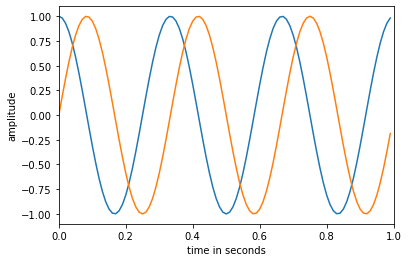

In [4]:
f = 3
t = np.arange(0,1,.01)
phi = 0
x = np.exp(1j*(2*np.pi*f*t + phi))
xim = np.imag(x)
plt.figure(1) #khỏi tạo figure đối tượng 1
plt.plot(t,np.real(x))
plt.plot(t,xim)
plt.axis([0,1,-1.1,1.1]) #nhận giá trị 0,1,-1.1,1.1 và biểu diễ trên trục số
plt.xlabel('time in seconds')#hiển thị time second cho trục hoành
plt.ylabel('amplitude')#hiển thị amplitude cho trục tung
plt.show() #hiển thị hình vẽ

Phiên bản rời rạc =ej(2πfnT+ϕ)

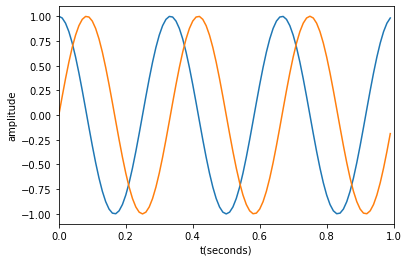

In [5]:
f = 3
N = 100
fs = 100
n = np.arange(N)
T = 1.0/fs
t = N*T
phi = 0
x = np.exp(1j*(2*np.pi*f*n*T + phi))
xim = np.imag(x)
plt.figure(1)#khỏi tạo figure đối tượng 1
plt.plot(n*T,np.real(x))#hình vẽ
plt.plot(n*T,xim)#hình vẽ
plt.axis([0,t,-1.1,1.1])#nhận giá trị và biểu diễ trên trục số
plt.xlabel('t(seconds)')#hiển thị t(second) cho trục hoành
plt.ylabel('amplitude')#hiển thị amplitude cho trục tung
plt.show()#hiển thị hình vẽ

Bạn cũng có thể làm điều đó dựa trên =ej(2πfn/N+ϕ) .

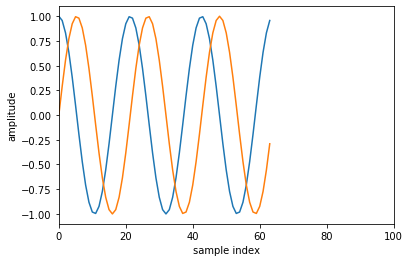

In [6]:
f = 3
N = 64 
n = np.arange(64)
phi = 0
x = np.exp(1j*(2*np.pi*f*n/N + phi))
xim = np.imag(x)
plt.figure(1)#khỏi tạo figure đối tượng 1
plt.plot(n,np.real(x))#hình vẽ theo n,np.real(x)
plt.plot(n,xim)#hình vẽ theo n, xim
plt.axis([0,samples,-1.1,1.1])#nhận giá trị và biểu diễ trên trục số
plt.xlabel('sample index')#hiển thị sample index cho trục hoành
plt.ylabel('amplitude')#hiển thị amplitude cho trục tung
plt.show()#hiển thị hình vẽ

Cuối cùng, bạn có thể sử dụng Scipy để ghi dữ liệu vào tệp cách ở đây là 1 giây ở 440 Hz

In [7]:
N = 44100 # samples
f = 440
fs = 44100
phi = 0
n = np.arange(N)
x = A*np.cos(2*np.pi*f*n/N + phi)
#scipy.io.wavfile.write(filename, rate, data)[source]
from scipy.io.wavfile import write
write('sine440_1sec.wav', 44100, x)#khai báo từ thư viện scipy